# Lecture 5 - Intro to ML: Clustering

## 1. Importing Libraries

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

from tensorflow.keras.datasets import mnist

from sklearn.manifold import TSNE

import seaborn as sn

## 2. Blob example

In [3]:
n_samples = 1500
random_state = 160
nb = 3
X, y = make_blobs(n_samples=n_samples, centers=nb, random_state=random_state)

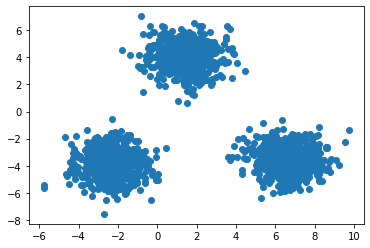

In [6]:
plt.scatter(X[:,0],X[:,1], label='True Position')

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [14]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 1.35972578  3.97554195]
 [ 6.66625165 -3.52244837]
 [-2.34103335 -3.92393739]]
[2 1 0 ... 1 2 0]


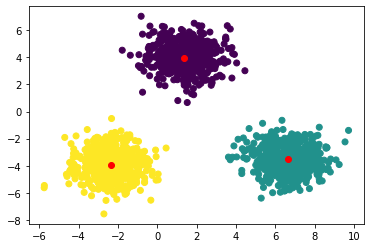

In [15]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red')

## 2. MNIST

In [28]:
def normalize(dataset):
    """
    Normalizes the values in an image array
    """
    return dataset/255.

# Reads the dataset and split it beween train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizes
x_train, x_test = normalize(x_train), normalize(x_test)

# Reformats to be acceptable by PCA
x_train = [np.concatenate(i) for i in x_train]
x_test = [np.concatenate(i) for i in x_test]

In [30]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(x_train)

KMeans(n_clusters=10)

In [31]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2 8 0 ... 2 5 3]


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


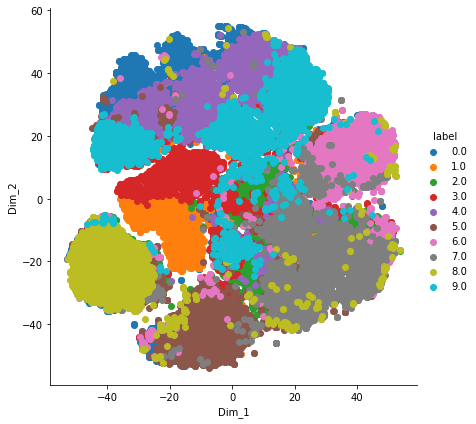

In [33]:
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(x_train)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, kmeans.labels_)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()